In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', None)
%matplotlib inline

In [2]:
df = pd.read_csv('DelayFlights_clean.csv')
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head()

,Date,DayOfWeek,UniqueCarrier,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008-01-03,Thursday,WN,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0.0,0.0,0.0,0.0,0.0
1,2008-01-03,Thursday,WN,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0.0,0.0,0.0,0.0,0.0
2,2008-01-03,Thursday,WN,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,2.0,0.0,0.0,0.0,32.0
3,2008-01-03,Thursday,WN,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0.0,0.0,0.0,0.0,0.0
4,2008-01-03,Thursday,WN,N763SW,240.0,250.0,230.0,57.0,67.0,IND,LAS,1591,3.0,7.0,10.0,0.0,0.0,0.0,47.0


### Nivell 1

- Exercici 1

Crea almenys tres models de classificació diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv.


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

- Exercici 2

Crea una nova variable segons si el vol ha arribat tard o no (ArrDelay > 0).


In [4]:
# 0 means no delay, 1 means delay
df['target']=df['ArrDelay'].apply(lambda x: 0 if x <0 else 1)

In [5]:
df.head()

,Date,DayOfWeek,UniqueCarrier,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,target
0,2008-01-03,Thursday,WN,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0.0,0.0,0.0,0.0,0.0,0
1,2008-01-03,Thursday,WN,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0.0,0.0,0.0,0.0,0.0,1
2,2008-01-03,Thursday,WN,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,2.0,0.0,0.0,0.0,32.0,1
3,2008-01-03,Thursday,WN,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0.0,0.0,0.0,0.0,0.0,1
4,2008-01-03,Thursday,WN,N763SW,240.0,250.0,230.0,57.0,67.0,IND,LAS,1591,3.0,7.0,10.0,0.0,0.0,0.0,47.0,1


In [6]:
df.target.value_counts(normalize=True)

1    0.904214
0    0.095786
Name: target, dtype: float64

+ data shows 90.4% of observations with delay (label 1)  and 9.6 % observation without delay (label 0)
+ imbalance dataset
+ si tenemos accuracy alrededor del 90% sera un resultado poco fiable debido a este imbalance


- Exercici 3

Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confiança i d’altres mètriques més avançades.

In [7]:
from sklearn.metrics import accuracy_score,confusion_matrix, plot_confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score

In [8]:
logistic = LogisticRegression()
neighbor = KNeighborsClassifier()
tree = DecisionTreeClassifier()

In [9]:
X= df[['ActualElapsedTime','DepDelay','TaxiIn','TaxiOut','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']]
y = df['target']

In [10]:
def analyze_clasification_model(model,X,y):
    print(model)
    model.fit(X,y)    
    y_pred = model.predict(X)
    conf_matrix = confusion_matrix(y,y_pred,normalize='true')
    print(conf_matrix)
    print(f'Accuracy : {accuracy_score(y,y_pred)}')
    print(f'Precision : {precision_score(y,y_pred)}')
    print(f'recall (sensitivity) : {recall_score(y,y_pred)}')
    print(f'ROC - AUC: {roc_auc_score(y,y_pred)}')
    
    plot_confusion_matrix(model,X,y,normalize='true')
    

LogisticRegression()
[[0.26418795 0.73581205]
 [0.01752239 0.98247761]]
Accuracy : 0.9136755601712695
Precision : 0.926494855953792
recall (sensitivity) : 0.9824776065371525
ROC - AUC: 0.6233327807297234


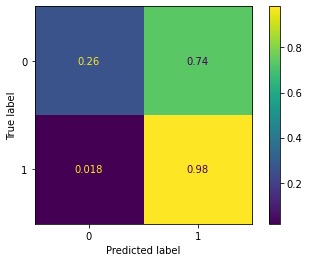

In [11]:
analyze_clasification_model(logistic,X,y)

KNeighborsClassifier()
[[0.54411376 0.45588624]
 [0.02571527 0.97428473]]
Accuracy : 0.9330804022562442
Precision : 0.9527729837873844
recall (sensitivity) : 0.9742847310045561
ROC - AUC: 0.759199246597183


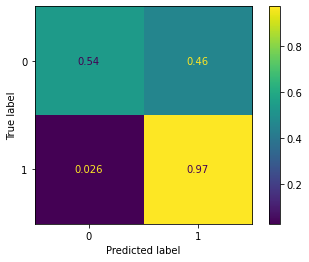

In [12]:
analyze_clasification_model(neighbor,X,y)

DecisionTreeClassifier()
[[0.85415507 0.14584493]
 [0.02446907 0.97553093]]
Accuracy : 0.963904829433037
Precision : 0.9844096229181186
recall (sensitivity) : 0.9755309292959605
ROC - AUC: 0.9148430016740883


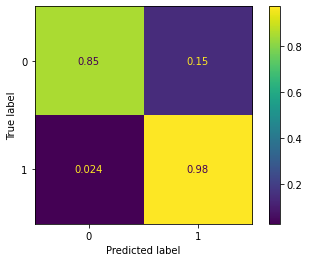

In [13]:
analyze_clasification_model(tree,X,y)

### El mejor modelo por ahora es Decision Tree, desde un punto de vista de accuracy, precision y recall y ROC-AUC, pero como no hay train/test seguramente hay overfitting



- Exercici 4

Entrena’ls utilitzant els diferents paràmetres que admeten.



In [14]:
# display all possible parameters
logistic.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

LogisticRegression(C=0.1, n_jobs=10)
[[0.26615519 0.73384481]
 [0.01763731 0.98236269]]
Accuracy : 0.9137600858824296
Precision : 0.9266690181347615
recall (sensitivity) : 0.9823626919312084
ROC - AUC: 0.6242589391983278


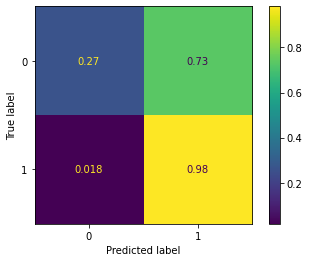

In [15]:
logistic_1 = LogisticRegression(C=0.1,n_jobs=10)
analyze_clasification_model(logistic_1,X,y)

+ no hay mucha diferencia en los resultados al variar varios parametros y comparar con los resultados del modelo inicial

In [16]:
# display all possible parameters
neighbor.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

KNeighborsClassifier(n_neighbors=3)
[[0.60803755 0.39196245]
 [0.0252568  0.9747432 ]]
Accuracy : 0.9396179545531632
Precision : 0.9591428529579775
recall (sensitivity) : 0.9747431986034005
ROC - AUC: 0.7913903723112835


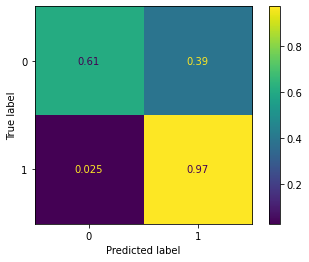

In [17]:
neighbor_1 = KNeighborsClassifier(n_neighbors=3)
analyze_clasification_model(neighbor_1,X,y)

+ usando 3 neighbors en vez del default n =5 los resultados no varian mucho cambiando los parametros

In [18]:
# display all possible parameters
tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

DecisionTreeClassifier(max_depth=5, max_features=5, min_samples_leaf=3)
[[0. 1.]
 [0. 1.]]
Accuracy : 0.9042140643246046
Precision : 0.9042140643246046
recall (sensitivity) : 1.0
ROC - AUC: 0.5


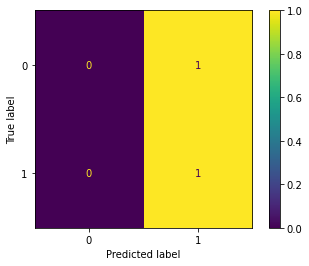

In [19]:
tree_1 = DecisionTreeClassifier(max_depth=5, max_features=5,min_samples_leaf=3)
analyze_clasification_model(tree_1,X,y)

+ hay bastante diferencia al cambiar los parametros x defecto. Hay que prestar atencion al ver que parametros usamos

- Exercici 5

Compara el seu rendiment utilitzant l’aproximació traint/test o utilitzant totes les dades (validació interna).

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y)

In [22]:
def analyze_clasification_model_1(model,X_train,X_test,y_train,y_test):
    print(model)
    model.fit(X_train,y_train)    
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test,y_pred,normalize='true')
    print(conf_matrix)
    print(f'Accuracy : {accuracy_score(y_test,y_pred)}')
    print(f'Precision : {precision_score(y_test,y_pred)}')
    print(f'recall (sensitivity) : {recall_score(y_test,y_pred)}')
    print(f'ROC - AUC: {roc_auc_score(y_test,y_pred)}')
    
    plot_confusion_matrix(model,X_test,y_test,normalize='true')    

In [23]:
logistic = LogisticRegression()
neighbor = KNeighborsClassifier()
tree = DecisionTreeClassifier()
modelos = [logistic,neighbor,tree]

LogisticRegression()
[[0.26664169 0.73335831]
 [0.01770163 0.98229837]]
Accuracy : 0.913747898073855
Precision : 0.9267089328110606
recall (sensitivity) : 0.9822983733318514
ROC - AUC: 0.6244700297572605
KNeighborsClassifier()
[[0.40666979 0.59333021]
 [0.04000381 0.95999619]]
Accuracy : 0.9069948153983924
Precision : 0.9385503478117451
recall (sensitivity) : 0.9599961893571922
ROC - AUC: 0.6833329892921792
DecisionTreeClassifier()
[[0.47728337 0.52271663]
 [0.06796837 0.93203163]]
Accuracy : 0.888472740911693
Precision : 0.9439202743283498
recall (sensitivity) : 0.9320316283353048
ROC - AUC: 0.7046575003503223


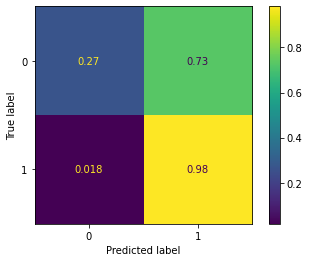

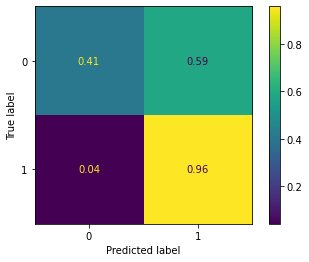

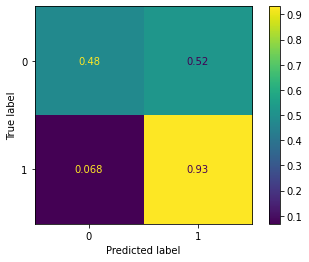

In [24]:
for model in modelos:
    analyze_clasification_model_1(model,X_train,X_test,y_train,y_test)

+ el rendimiento es peor que antes por lo que debiamos estar haciendo overfitting

### Nivell 2

- Exercici 6

Realitza algun procés d’enginyeria de variables per millorar-ne la predicció

In [25]:
X.head()

,ActualElapsedTime,DepDelay,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,128.0,8.0,4.0,8.0,0.0,0.0,0.0,0.0,0.0
1,128.0,19.0,5.0,10.0,0.0,0.0,0.0,0.0,0.0
2,90.0,34.0,3.0,10.0,2.0,0.0,0.0,0.0,32.0
3,101.0,25.0,4.0,10.0,0.0,0.0,0.0,0.0,0.0
4,240.0,67.0,3.0,7.0,10.0,0.0,0.0,0.0,47.0


In [26]:
from sklearn.preprocessing import RobustScaler

In [27]:
transformer = RobustScaler()

In [28]:
X_new = pd.DataFrame(transformer.fit_transform(X),columns=X.columns)

In [29]:
X_new.head()

,ActualElapsedTime,DepDelay,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0.141176,-0.404762,-0.50,-0.545455,0.000000,0.0,0.0,0.0,0.000000
1,0.141176,-0.142857,-0.25,-0.363636,0.000000,0.0,0.0,0.0,0.000000
2,-0.305882,0.214286,-0.75,-0.363636,0.181818,0.0,0.0,0.0,1.684211
3,-0.176471,0.000000,-0.50,-0.363636,0.000000,0.0,0.0,0.0,0.000000
4,1.458824,1.000000,-0.75,-0.636364,0.909091,0.0,0.0,0.0,2.473684


In [32]:
X_train, X_test,y_train,y_test = train_test_split(X_new,y,test_size=0.3)

LogisticRegression()
LogisticRegression()
[[0.26710883 0.73289117]
 [0.01756396 0.98243604]]
Accuracy : 0.9137245682639211
Precision : 0.9265507421131173
recall (sensitivity) : 0.9824360435336766
ROC - AUC: 0.6247724355921536
KNeighborsClassifier()
KNeighborsClassifier()
[[0.39863615 0.60136385]
 [0.03978344 0.96021656]]
Accuracy : 0.9062733858912078
Precision : 0.9376021370512028
recall (sensitivity) : 0.9602165566148239
ROC - AUC: 0.6794263539729888
DecisionTreeClassifier()
DecisionTreeClassifier()
[[0.47843064 0.52156936]
 [0.068477   0.931523  ]]
Accuracy : 0.888000760910724
Precision : 0.9438433237381997
recall (sensitivity) : 0.9315230036807477
ROC - AUC: 0.7049768217843253


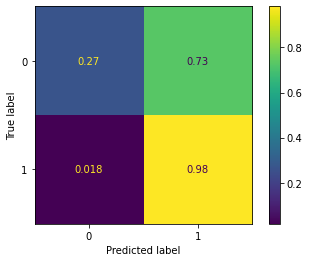

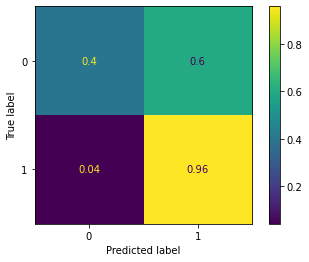

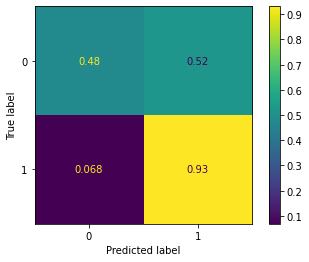

In [33]:
for model in modelos:    
    analyze_clasification_model_1(model,X_train,X_test,y_train,y_test)

### Nivell 3

- Exercici 7

No utilitzis la variable DepDelay a l’hora de fer prediccions

In [34]:
X_1 = X_new.drop('DepDelay',axis=1) # remove DepDelay
X_1.head()

,ActualElapsedTime,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0.141176,-0.50,-0.545455,0.000000,0.0,0.0,0.0,0.000000
1,0.141176,-0.25,-0.363636,0.000000,0.0,0.0,0.0,0.000000
2,-0.305882,-0.75,-0.363636,0.181818,0.0,0.0,0.0,1.684211
3,-0.176471,-0.50,-0.363636,0.000000,0.0,0.0,0.0,0.000000
4,1.458824,-0.75,-0.636364,0.909091,0.0,0.0,0.0,2.473684


In [35]:
X_train, X_test,y_train,y_test = train_test_split(X_1,y,test_size=0.3,stratify=y)

In [ ]:
for model in modelos:
    analyze_clasification_model_1(model,X_train,X_test,y_train,y_test)

LogisticRegression()
[[0.08093677 0.91906323]
 [0.008697   0.991303  ]]
Accuracy : 0.9041019189665971
Precision : 0.9105692539082084
recall (sensitivity) : 0.9913030016750951
ROC - AUC: 0.536119884912489
